### The objective of this notebook is to practice image classification using Tensorflow.

Through this notebook I will try to perform the various steps and data handeling I've learned as well as new that might come with questioning on how I can improve different steps.

### Problem
Itenditfy the breed of the dog corresponding to the image that is being showed

### Data
The data can be found on the folder of this code as well as on kaggle from a previous competition.

Kaggle link: https://www.kaggle.com/competitions/dog-breed-identification/data

### Observations
There are 120 different dog breeds - multiclassification problem
Over 10,000 images on the training set - with labels
Over 10,000 images on the test set - without labels

In [1]:
# Basic import to start the notebook
import pandas as pd
import tensorflow as tf
import numpy as np

### Basic Data Exploration

In [2]:
dog_labels = pd.read_csv("labels.csv")
dog_labels.info()
print("\n Shape:",dog_labels.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB

 Shape: (10222, 2)


In [3]:
dog_labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,875c993f6f71781ae8ba11e686669cee,scottish_deerhound
freq,1,126


In [4]:
dog_labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
dog_labels.tail()

,id,breed
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher
10221,fff43b07992508bc822f33d8ffd902ae,chesapeake_bay_retriever


In [6]:
dog_labels["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

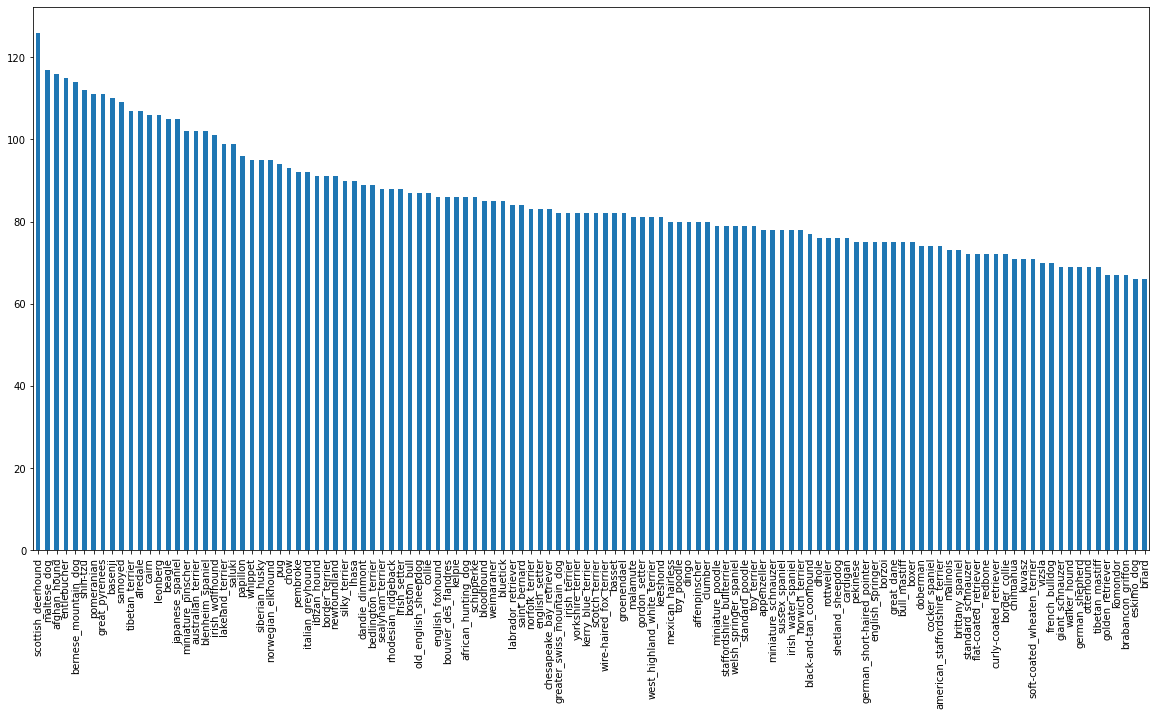

In [7]:
dog_labels["breed"].value_counts().plot.bar(figsize=(20,10));

Verifying the average and the mean of dog breeds

In [8]:
print("Mean: \n",dog_labels["breed"].value_counts().mean())
print("------------------")
print("Median: \n",dog_labels["breed"].value_counts().median())

Mean: 
 85.18333333333334
------------------
Median: 
 82.0


By checking the average and median of the dataset, according to google we have more than 10 images of each dog which is the bare minimun to proceed with identification. 


Checking 1 of the images and displaying it to visualize the dog breed

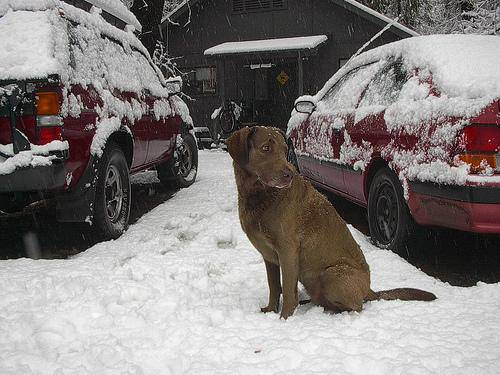

In [9]:
from IPython.display import Image

Image("C:/Users/dnek/Desktop/GitHub_Datasets/DogBreed_Dataset/train/fff43b07992508bc822f33d8ffd902ae.jpg")

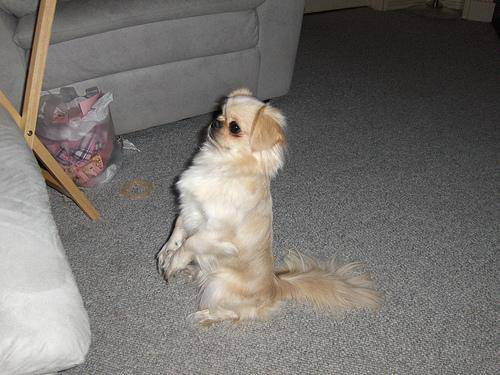

In [10]:
Image("C:/Users/dnek/Desktop/GitHub_Datasets/DogBreed_Dataset/train/001cdf01b096e06d78e9e5112d419397.jpg")

By checking that the images are working properly, now will get the images and it's labels to start the modelling process.

- Creating pathnames for images

In [11]:
images_name = ["C:/Users/dnek/Desktop/GitHub_Datasets/DogBreed_Dataset/train/"+ iname +".jpg" for iname in dog_labels["id"]]
images_name[:10]

['C:/Users/dnek/Desktop/GitHub_Datasets/DogBreed_Dataset/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'C:/Users/dnek/Desktop/GitHub_Datasets/DogBreed_Dataset/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'C:/Users/dnek/Desktop/GitHub_Datasets/DogBreed_Dataset/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'C:/Users/dnek/Desktop/GitHub_Datasets/DogBreed_Dataset/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'C:/Users/dnek/Desktop/GitHub_Datasets/DogBreed_Dataset/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'C:/Users/dnek/Desktop/GitHub_Datasets/DogBreed_Dataset/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'C:/Users/dnek/Desktop/GitHub_Datasets/DogBreed_Dataset/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'C:/Users/dnek/Desktop/GitHub_Datasets/DogBreed_Dataset/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'C:/Users/dnek/Desktop/GitHub_Datasets/DogBreed_Dataset/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'C:/Users/dnek/Desktop/GitHub_Datasets/DogBreed_Dataset/train/0042188c895a2f14ef6

Compare the filenames and check if it matches with the actual number of images files before progressing

In [12]:
import os

os.listdir("C:/Users/dnek/Desktop/GitHub_Datasets/DogBreed_Dataset/train/")[:10]

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '002211c81b498ef88e1b40b9abf84e1d.jpg',
 '00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '002a283a315af96eaea0e28e7163b21b.jpg',
 '003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '0042188c895a2f14ef64a918ed9c7b64.jpg']

In [13]:
if len(os.listdir("C:/Users/dnek/Desktop/GitHub_Datasets/DogBreed_Dataset/train/")) == len(images_name):
    print("Imagines_Name match")
else:
    print("Does not match")

Imagines_Name match


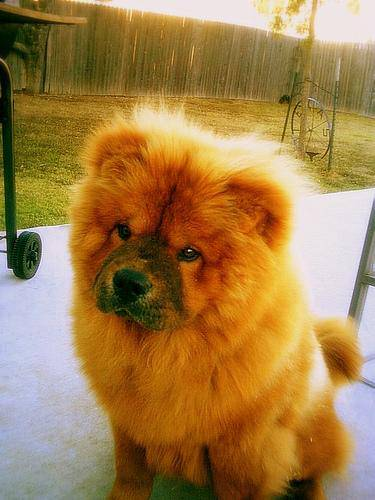

In [14]:
Image(images_name[8310])

In [15]:
dog_labels["breed"][8310]

'chow'

Starting to prepare the data to proceed with the modelling

In [16]:
labels = dog_labels["breed"]
labels

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [17]:
import numpy as np
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [18]:
len(labels)

10222

In [19]:
if len(labels) == len(images_name):
    print("Match")
else:
    print("Does not Match")

Match


Finding the 120 unique breed values that was mentioned before on the describe during data exploration and adding them to array format so it can be converted into numbers on encoding

In [20]:
unique = np.unique(labels)
print(unique[:10])
print("\nAmount of uniques:", len(unique))

['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle']

Amount of uniques: 120


In [21]:
unique_labels = [label == unique for label in labels]
unique_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [22]:
len(unique_labels)

10222

Creating a validation dataset

In [23]:
# Splitting X and y
X = images_name
y = unique_labels

In [24]:
print("Images_Name:",len(images_name))
print("Unique_labels:",len(unique_labels))

Images_Name: 10222
Unique_labels: 10222


Creating a smaller dataset of 2000 images to work so it does not take long to train the model and go over observations and keep on training and make quick changes to better improve the model

In [25]:
num_images = 2000

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:num_images],y[:num_images],test_size=0.2,random_state=30)

In [27]:
print("X_train len:", len(X_train))
print("X_Val len:", len(X_val))
print("y_train len:", len(y_train))
print("y_val len:", len(y_val))

X_train len: 1600
X_Val len: 400
y_train len: 1600
y_val len: 400


In [28]:
X_train[:2],y_train[:2]

(['C:/Users/dnek/Desktop/GitHub_Datasets/DogBreed_Dataset/train/26e23a0539ba67e89aae10ec35c4eb12.jpg',
  'C:/Users/dnek/Desktop/GitHub_Datasets/DogBreed_Dataset/train/24002364f324a040f35f6a69d5138435.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False,  True, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
 

In [29]:
# Converting the images into an array
from matplotlib.pyplot import imread

image = imread(images_name[42])
image.shape

(257, 350, 3)

In [30]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [31]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [32]:
# Defining image size
img_size = 224

def read_image(image_path):
    
    # Read image file
    image = tf.io.read_file(image_path)
    
    # Turn jpeg image to numerical
    image = tf.image.decode_jpeg(image,channels =3)
    
    # Normalize the data
    image = tf.image.convert_image_dtype(image,tf.float32)
    
    # Reize image
    image = tf.image.resize(image,size=[img_size, img_size])
    
    return image

In [33]:
# Returning tuple of image + label  in a function

def get_image_label(image_path,label):
    
    image = read_image(image_path)
    return image, label

In [34]:
(read_image(X[42]),y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [43]:
batch_size = 32

def create_batches (X, y=None, batch_size=batch_size, valid_data=False, test_data=False):
    
    if test_data:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        data_batch = data.map(read_image).batch(batch_size)
        return data_batch
    
    elif valid_data:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        data_batch = data.map(get_image_label).batch(batch_size)
        return data_batch
    
    else:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        # Shuffeling the pathnames and labels before maping to process faster
        data = data.shuffle(buffer_size=len(X))
        
        # Creating (Image, label) tuples
        data = data.map(get_image_label)
                                                  
        # Turning data into batches
        data_batch = data.batch(batch_size)
    return data_batch

In [36]:
# Creating training and validations
train_data = create_batches(X_train,y_train)
val_data = create_batches(X_val, y_val, valid_data=True)

In [37]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [38]:
import matplotlib.pyplot as plt

def show_images(images, labels):
    
    plt.figure(figsize=(20,15))
    
    #Loop through N images
    for i in range(25):
        # Creating subplots
        ax = plt.subplot(5,5, i+1)
        # Display Images
        plt.imshow(images[i])
        # Adding the image label
        plt.title(unique[labels[i].argmax()])
        plt.axis("off")

In [39]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[3.91802080e-02, 6.27096146e-02, 2.34939307e-02],
          [6.30581230e-02, 8.65875334e-02, 4.73718457e-02],
          [8.31891969e-02, 1.06718615e-01, 5.42477779e-02],
          ...,
          [6.41454518e-01, 5.68520308e-01, 5.38688719e-01],
          [2.76992936e-02, 5.89415431e-02, 3.94633645e-03],
          [9.85620394e-02, 1.59127295e-01, 9.24098417e-02]],
 
         [[6.47416040e-02, 8.82710144e-02, 4.90553230e-02],
          [4.30563651e-02, 6.65857792e-02, 2.73700897e-02],
          [6.23092242e-02, 8.58386308e-02, 3.87798101e-02],
          ...,
          [5.46852231e-01, 4.73877728e-01, 4.40044075e-01],
          [6.46732897e-02, 6.41482845e-02, 5.19740162e-04],
          [1.57922804e-01, 1.81233376e-01, 1.06563427e-01]],
 
         [[4.59955856e-02, 6.95250034e-02, 3.03093120e-02],
          [3.85766812e-02, 6.21060953e-02, 2.28904076e-02],
          [4.37646210e-02, 6.72940314e-02, 2.56098602e-02],
          ...,
          [3.86880934e-01, 3.10340196e-01, 2.6937

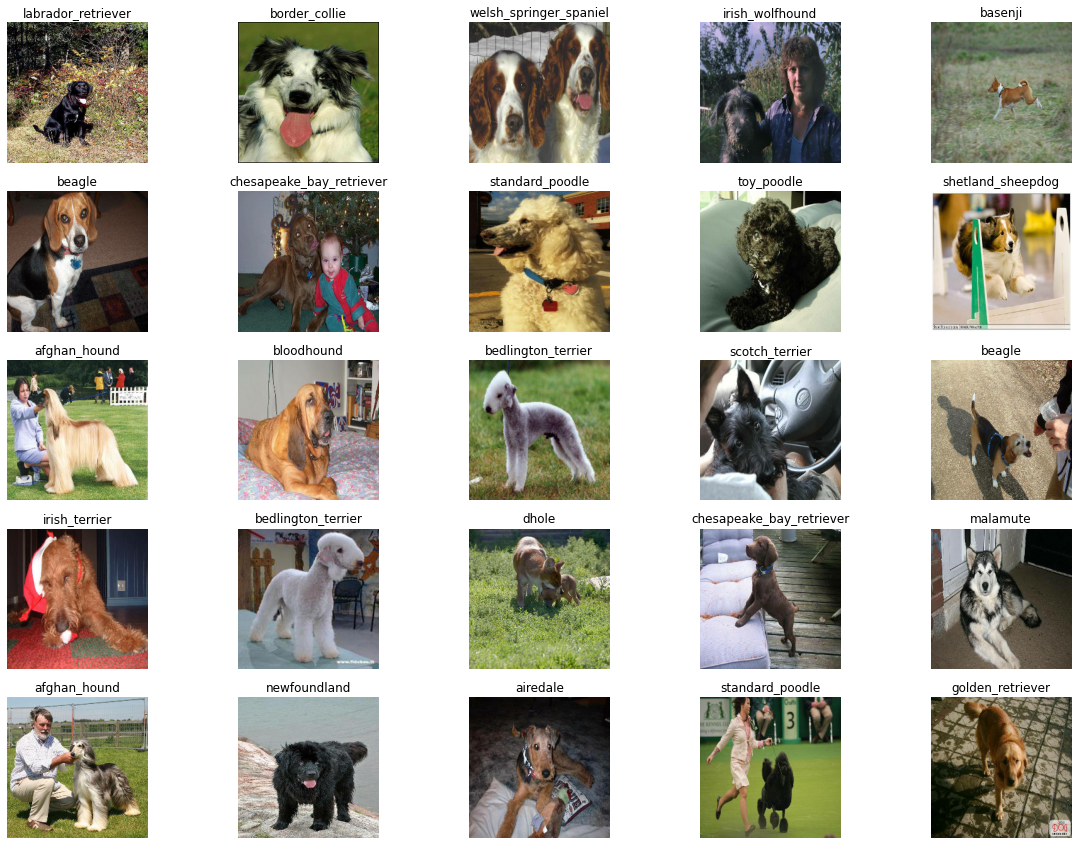

In [53]:
# Train Images
train_images, train_labels = next(train_data.as_numpy_iterator())
show_images(train_images,train_labels)

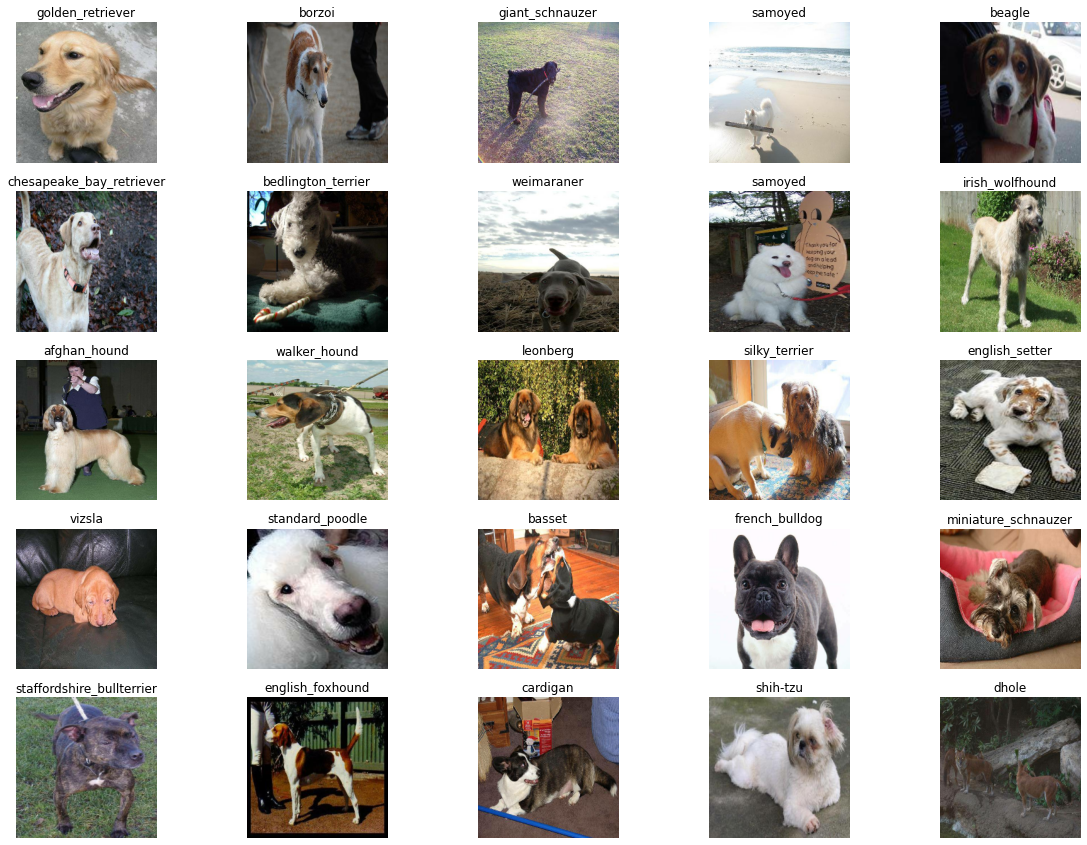

In [52]:
# Validation Images
val_images, val_labels = next(val_data.as_numpy_iterator())
show_images(val_images, val_labels)

In [ ]:
## Building the model to predict the right breed

